1. Data Loading and Preprocessing with Dask

In [4]:
import dask.dataframe as dd
import pandas as pd

# Load the large dataset using Dask for efficient processing
file_path = '/Users/cheryl/Downloads/Ecommerce_Consumer_Behavior_Analysis_Data.csv'
dask_data = dd.read_csv(file_path)

# Check the structure of the dataset
print(dask_data.head())

# Process categorical columns by converting object columns to category type for better performance
categorical_columns = dask_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dask_data[col] = dask_data[col].astype('category')

# Ensure known categories for all categorical columns before applying One-Hot Encoding
for col in categorical_columns:
    dask_data[col] = dask_data[col].cat.as_known()

# Apply One-Hot Encoding to categorical columns using Dask's get_dummies method
dask_data_encoded = dd.get_dummies(dask_data, columns=categorical_columns, drop_first=True)

# Compute the result (process data) and save the results to a file
dask_data_encoded_computed = dask_data_encoded.compute()
dask_data_encoded_computed.to_csv('/Users/cheryl/Downloads/Ecommerce_Consumer_Behavior_Analysis_Encoded.csv', index=False)

# Load the processed data for further analysis
data_encoded = pd.read_csv('/Users/cheryl/Downloads/Ecommerce_Consumer_Behavior_Analysis_Encoded.csv')
print(data_encoded.head())


   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors        $333.80   ...   
1       High  Huocheng      Food & Beverages        $222.22   ...   
2       High    Huzhen       Office Supplies        $426.22   ...   
3     Middle    Wiwilí       Home Appliances        $101.31   ...   
4     Middle      Nara             Furniture        $211.70   ...   

   Customer_Satisfaction Engagement_with_Ads  Device_Used_for_Shopping  \
0                      7                None                

2. Descriptive Statistics and Data Summar

In [2]:
# 1. Descriptive Statistics and Data Summary
# Get a summary of numerical features
print("Descriptive Statistics:")
print(data_encoded.describe())

# Get the data types of each column
print("\nData Types:")
print(data_encoded.dtypes)


Descriptive Statistics:
               Age  Frequency_of_Purchase  Brand_Loyalty  Product_Rating  \
count  1000.000000            1000.000000    1000.000000     1000.000000   
mean     34.304000               6.945000       3.026000        3.033000   
std       9.353238               3.147361       1.416803        1.436654   
min      18.000000               2.000000       1.000000        1.000000   
25%      26.000000               4.000000       2.000000        2.000000   
50%      34.500000               7.000000       3.000000        3.000000   
75%      42.000000              10.000000       4.000000        4.000000   
max      50.000000              12.000000       5.000000        5.000000   

       Time_Spent_on_Product_Research(hours)  Return_Rate  \
count                            1000.000000  1000.000000   
mean                                1.013030     0.954000   
std                                 0.791802     0.810272   
min                                 0.000000   

3. Check for Missing Values

In [5]:
# 2. Check for Missing Values
print("Missing values in each column:")
print(data_encoded.isnull().sum())


Missing values in each column:
Age                                      0
Frequency_of_Purchase                    0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
                                        ..
Purchase_Intent_Need-based               0
Purchase_Intent_Planned                  0
Purchase_Intent_Wants-based              0
Shipping_Preference_No Preference        0
Shipping_Preference_Standard             0
Length: 3366, dtype: int64


4. Visualizing Distributions

In this section, we will plot the distributions of key numerical features in the dataset. The aim is to better understand the distribution of important variables like Age, Frequency_of_Purchase, and Time_Spent_on_Product_Research(hours).

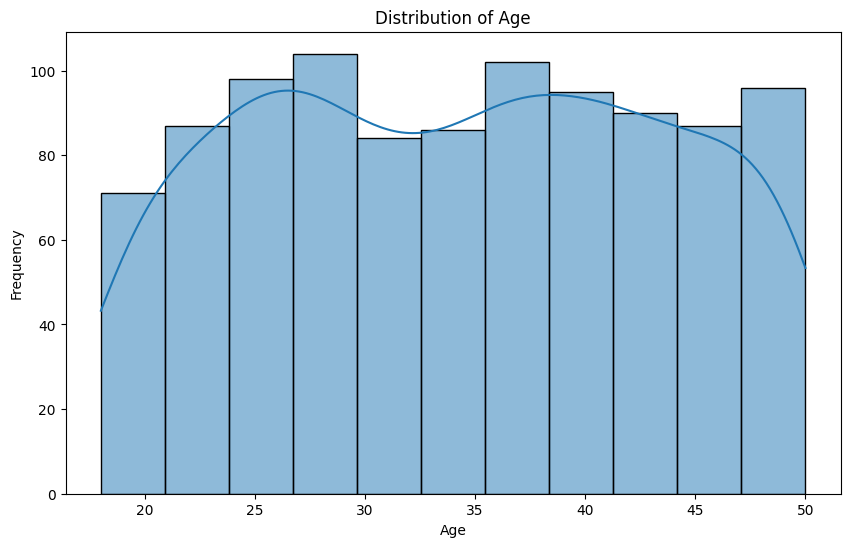

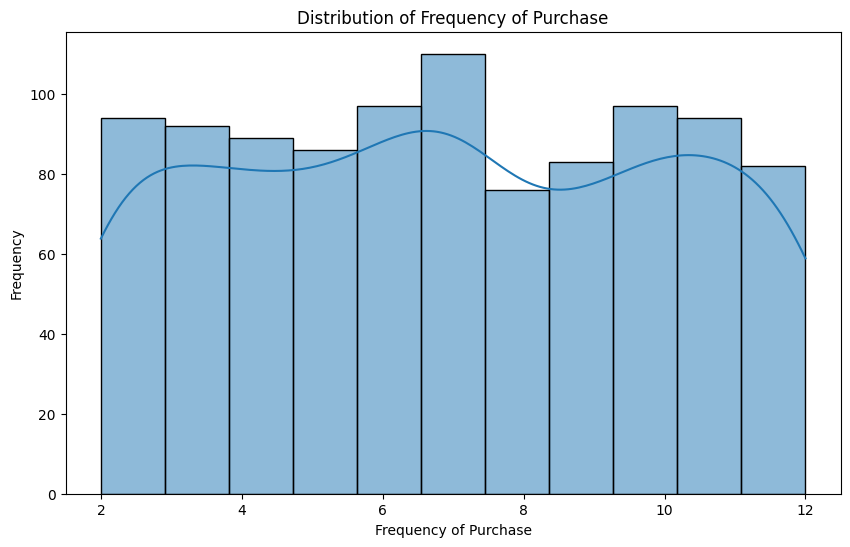

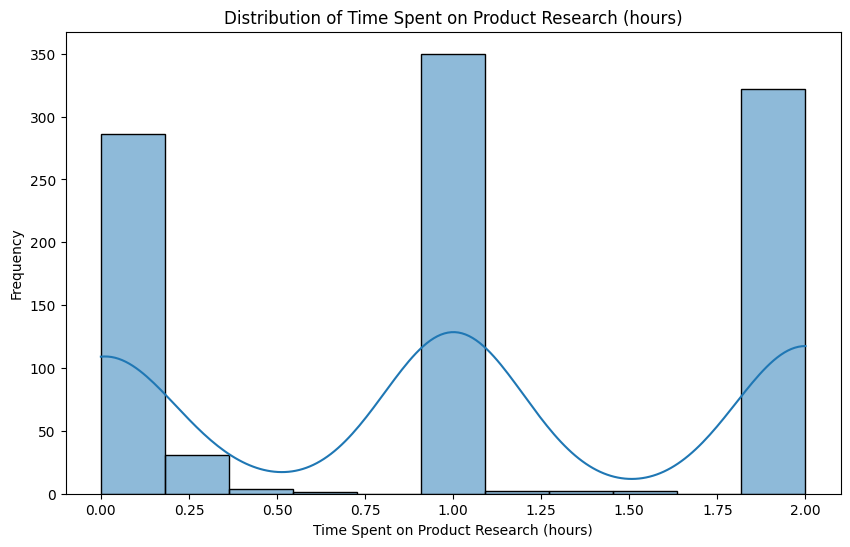

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 3. Visualizing Distributions
# Plot distributions for key numerical features (e.g., Age, Frequency_of_Purchase)
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Frequency_of_Purchase
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Frequency_of_Purchase'], kde=True)
plt.title('Distribution of Frequency of Purchase')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Time Spent on Product Research (hours)
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Time_Spent_on_Product_Research(hours)'], kde=True)
plt.title('Distribution of Time Spent on Product Research (hours)')
plt.xlabel('Time Spent on Product Research (hours)')
plt.ylabel('Frequency')
plt.show()


5. Correlation Matrix

In this section, we will generate a correlation matrix to examine the relationships between the numerical features in the dataset. A heatmap of the co

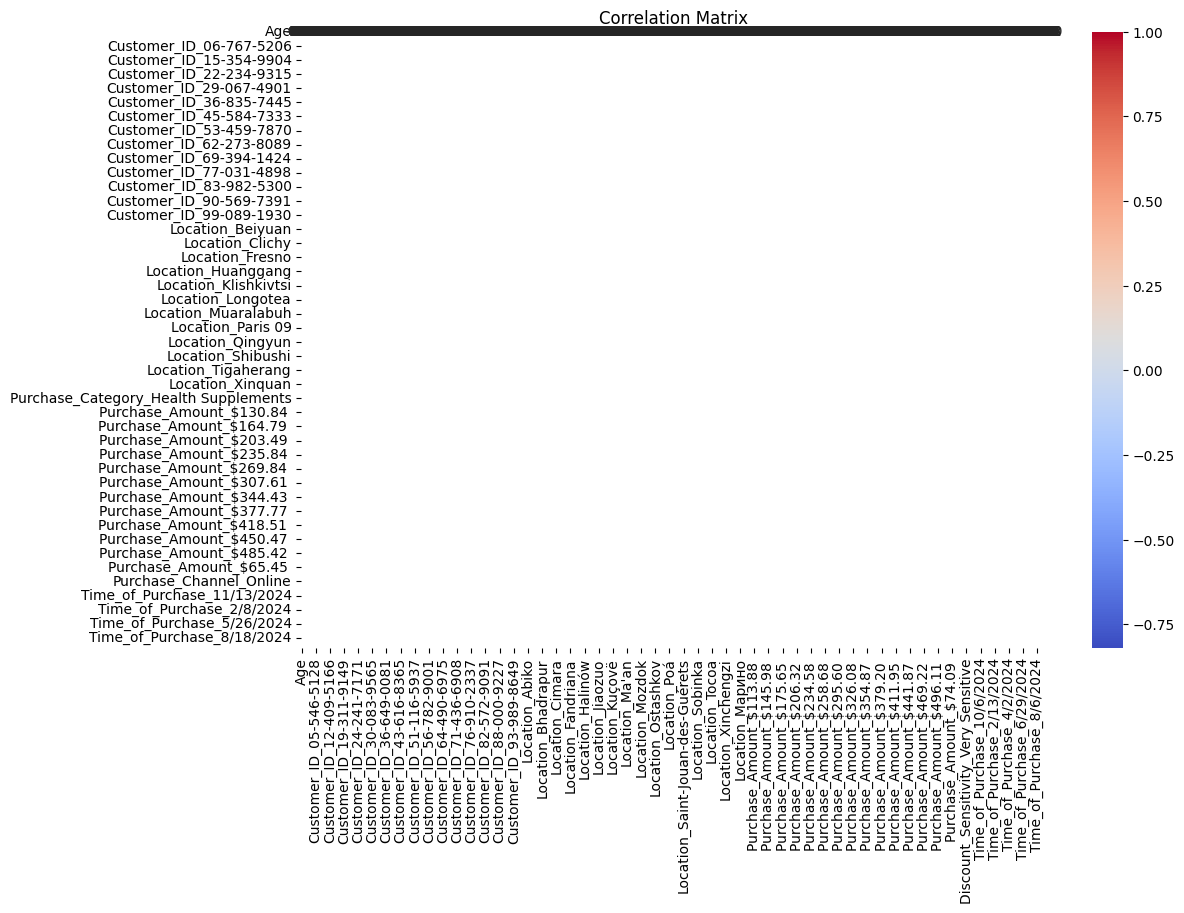

In [8]:
# 4. Correlation Matrix
# Generate a heatmap to see correlations between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


6. Visualizing One-Hot Encoded Gender Distribution

In this section, we will visualize the distribution of the Gender column after one-hot encoding. Since gender is typically a binary variable, the one-hot encoding creates two separate columns: Gender_Female and Gender_Male. We will use count plots to visualize the distribution of each gender.

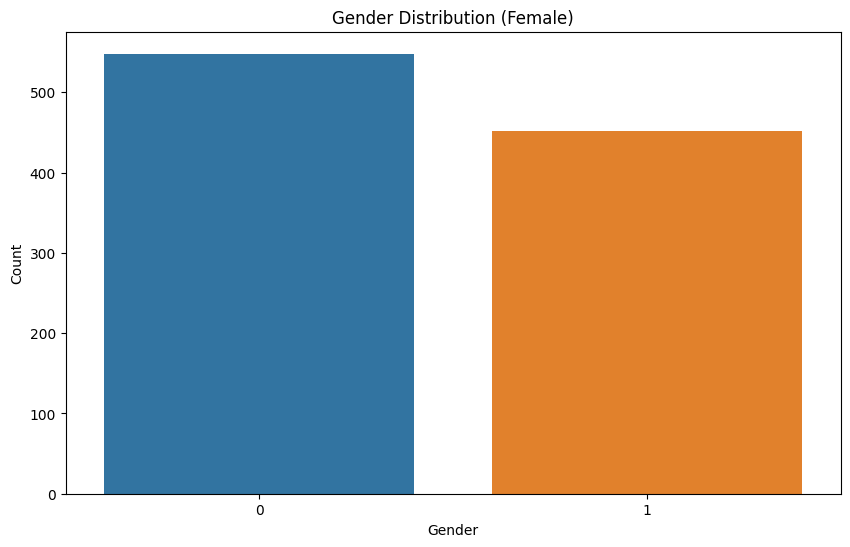

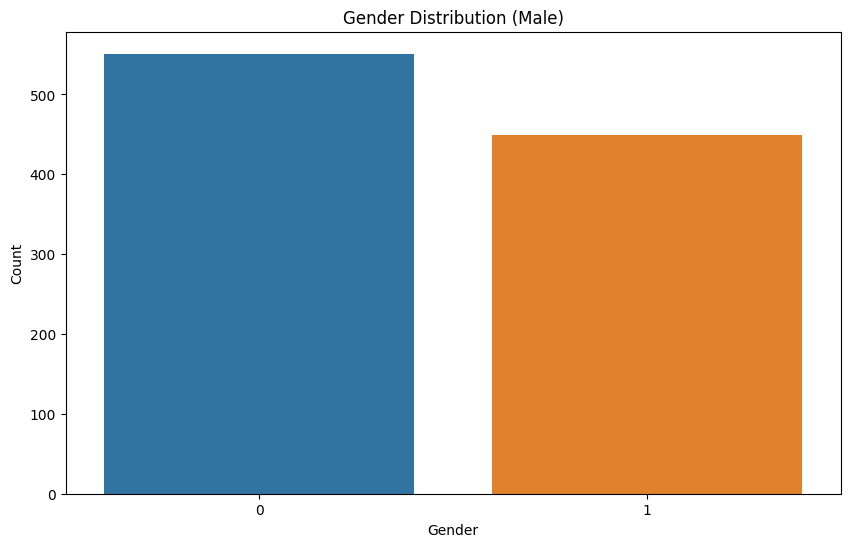

In [9]:
# Plot the distribution for one-hot encoded Gender columns
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender_Female', data=data_encoded)
plt.title('Gender Distribution (Female)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# If you have Gender_Male as a column, you can visualize it similarly
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender_Male', data=data_encoded)
plt.title('Gender Distribution (Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


7. Feature Correlations with Target Variable (Customer Satisfaction)

In this section, we will visualize how some of the features are related to the Customer Satisfaction target variable using scatterplots and boxplots.

Scatterplot: Time Spent on Product Research vs Customer Satisfaction
We'll create a scatterplot to observe any relationship between the time spent on product research and customer satisfaction.

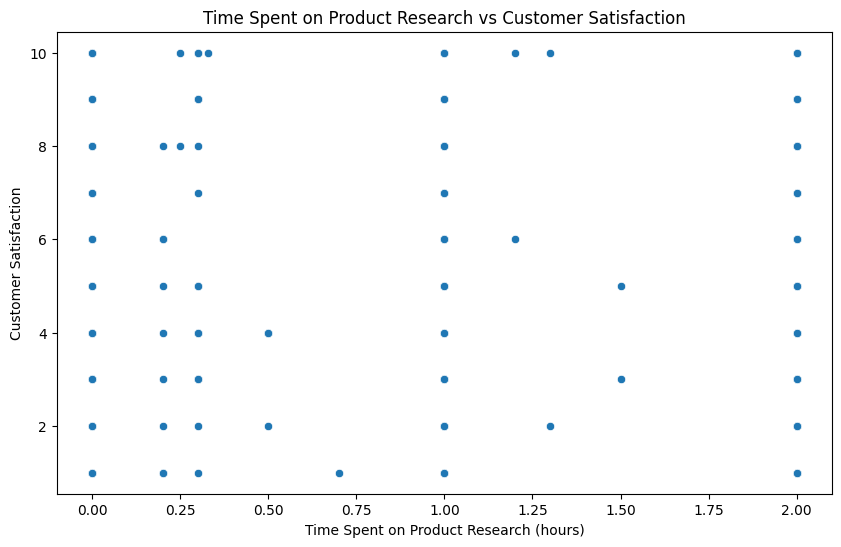

In [10]:
# Visualizing time spent on product research vs customer satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_Spent_on_Product_Research(hours)', y='Customer_Satisfaction', data=data_encoded)
plt.title('Time Spent on Product Research vs Customer Satisfaction')
plt.xlabel('Time Spent on Product Research (hours)')
plt.ylabel('Customer Satisfaction')
plt.show()


Boxplot: Purchase Intent vs Customer Satisfaction

Next, we'll use a boxplot to show the relationship between different levels of Purchase Intent (Need-based, Wants-based) and Customer Satisfaction.




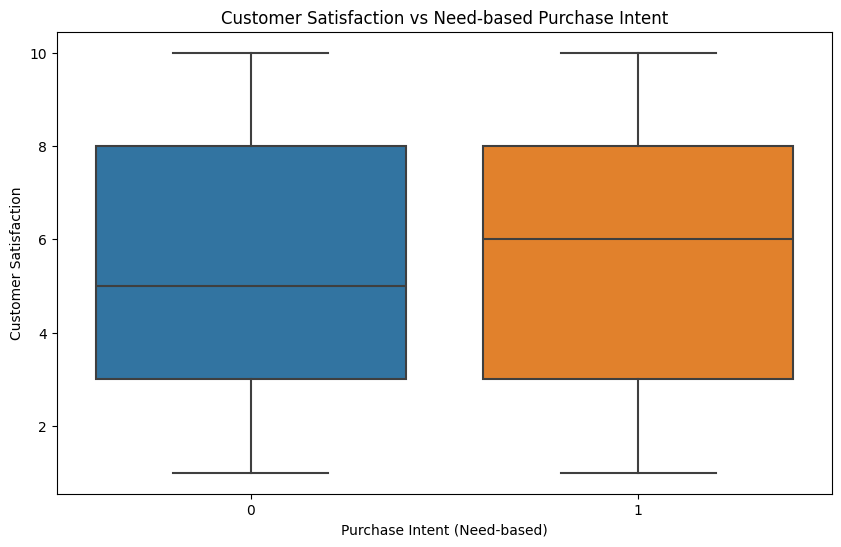

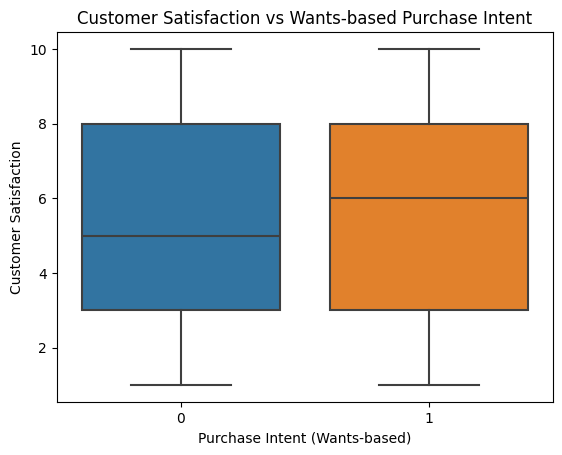

In [11]:
# Visualize Purchase Intent vs Customer Satisfaction using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Intent_Need-based', y='Customer_Satisfaction', data=data_encoded)
plt.title('Customer Satisfaction vs Need-based Purchase Intent')
plt.xlabel('Purchase Intent (Need-based)')
plt.ylabel('Customer Satisfaction')
plt.show()

sns.boxplot(x='Purchase_Intent_Wants-based', y='Customer_Satisfaction', data=data_encoded)
plt.title('Customer Satisfaction vs Wants-based Purchase Intent')
plt.xlabel('Purchase Intent (Wants-based)')
plt.ylabel('Customer Satisfaction')
plt.show()


8. ANOVA Test: Analyzing Customer Satisfaction Based on Purchase Intent

In this section, we will use an ANOVA (Analysis of Variance) test to examine whether there are statistically significant differences in Customer Satisfaction between different Purchase Intent groups (e.g., Need-based, Wants-based).

In [12]:
from scipy import stats

# Group the data by 'Purchase_Intent_Need-based' and perform ANOVA
purchase_intent_groups = data_encoded.groupby('Purchase_Intent_Need-based')['Customer_Satisfaction']
f_statistic, p_value = stats.f_oneway(*[group for name, group in purchase_intent_groups])
print("ANOVA Test result:", f_statistic, p_value)


ANOVA Test result: 0.024064083639569397 0.876753333069725


9. Feature Engineering: Creating New Features Based on Existing Data

Feature engineering helps in creating new variables that may improve the model's ability to learn from the data. In this section, we will create new features such as:

Purchase_Intent_Satisfaction: A product of the Purchase Intent and Customer Satisfaction.

Purchase_Research_Ratio: The ratio of Frequency of Purchase to Time Spent on Product Research (hours).

In [13]:
# Create new features as combinations of existing features
data_encoded['Purchase_Intent_Satisfaction'] = data_encoded['Purchase_Intent_Need-based'] * data_encoded['Customer_Satisfaction']
data_encoded['Purchase_Research_Ratio'] = data_encoded['Frequency_of_Purchase'] / data_encoded['Time_Spent_on_Product_Research(hours)']

# Display the updated dataset with new features
print(data_encoded[['Purchase_Intent_Satisfaction', 'Purchase_Research_Ratio']].head())


   Purchase_Intent_Satisfaction  Purchase_Research_Ratio
0                             7                 2.000000
1                             0                 5.500000
2                             0                 6.666667
3                             1                 6.000000
4                             0                      inf


10. Clustering Analysis: Customer Segmentation

In this section, we will apply K-means clustering to segment the customers into distinct groups based on their behavior. This allows us to identify patterns and tailor strategies for each customer segment.

Step-by-Step Process:
Select features for clustering: We'll use features such as Age, Frequency of Purchase, Time Spent on Product Research, and Customer Satisfaction.

Standardize the data: Since K-means is sensitive to the scale of the features, we will standardize the features to have a mean of 0 and a standard deviation of 1.

Apply K-means clustering: We'll apply the K-means algorithm and choose 4 clusters (this can be adjusted based on results).

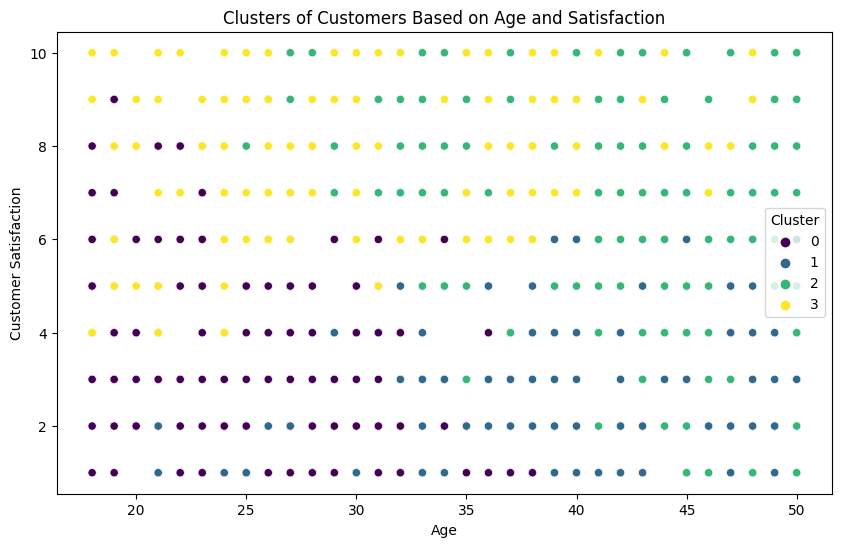

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
cluster_columns = ['Age', 'Frequency_of_Purchase', 'Time_Spent_on_Product_Research(hours)', 'Customer_Satisfaction']
data_for_clustering = data_encoded[cluster_columns].dropna()

# Standardize the data before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Customer_Satisfaction', hue='Cluster', data=data_encoded, palette='viridis')
plt.title('Clusters of Customers Based on Age and Satisfaction')
plt.xlabel('Age')
plt.ylabel('Customer Satisfaction')
plt.show()


11. Feature Importance from Random Forest Model

In this section, we will analyze the feature importance using a Random Forest model. This helps identify which features have the most significant impact on the predictions, allowing us to focus on the most influential attributes when making decisions.

Step-by-Step Process:
Train the Random Forest model: We will train a Random Forest classifier to predict a target variable (e.g., Purchase Intent).

Feature importance: After fitting the model, we can extract the importance of each feature, which helps us understand which features the model is relying on the most to make decisions.

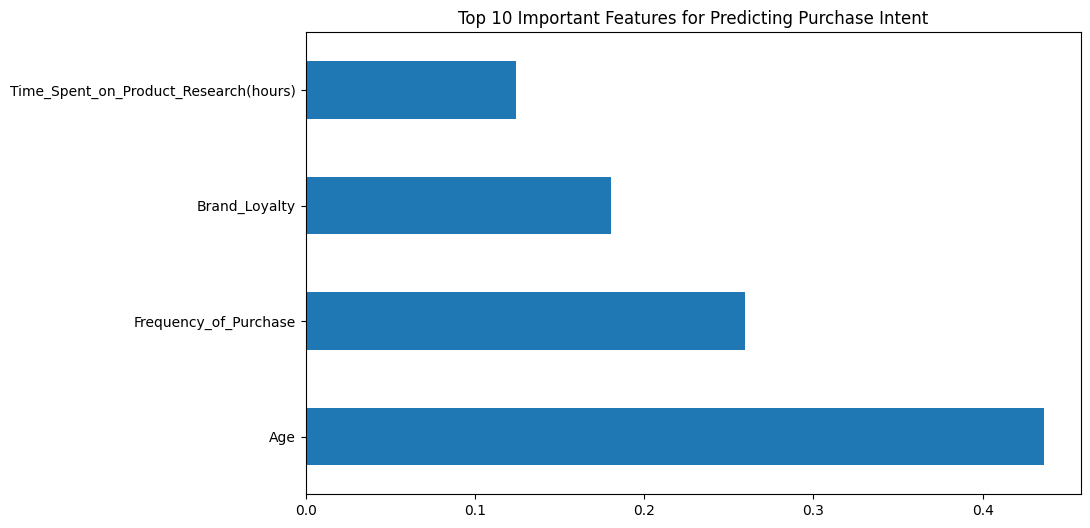

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for modeling
X = data_encoded[['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Time_Spent_on_Product_Research(hours)']]
y = data_encoded['Customer_Satisfaction']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract and plot the feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Important Features for Predicting Purchase Intent')
plt.show()


12. Hyperparameter Tuning (GridSearchCV for RandomForest)

In this section, we will perform hyperparameter tuning using GridSearchCV. This method helps us find the optimal set of parameters for the Random Forest model to improve its performance.

Step-by-Step Process:
Define a parameter grid: We will define a grid of hyperparameters (e.g., n_estimators, max_depth, and min_samples_split) that we want to test.

GridSearchCV: This function will search over the parameter grid and find the best combination of hyperparameters using cross-validation.

Evaluate the best parameters: After the grid search, we will check the best parameters and fit the model with them.

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


13. Final Model Evaluation

Once we have the best model from GridSearchCV, we will evaluate its performance on the test data. This includes generating a classification report and assessing accuracy, as well as evaluating the model's performance using various metrics.

Step-by-Step Process:
Obtain the best model: From the previous section, we already have the best_rf_model from GridSearchCV.

Make predictions: Use the model to predict on the test dataset.

Classification Report: Generate a classification report to check metrics like precision, recall, F1-score, and support.

Model Accuracy: Print the accuracy and the ROC AUC score to evaluate the overall model performance.

In [19]:
# Get the best Random Forest model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# For multi-class classification, set multi_class='ovr' or 'ovo'
# roc_auc_score for multi-class classification requires probabilities, so we use predict_proba
y_pred_prob = best_rf_model.predict_proba(X_test)

# If it's multi-class, we calculate the AUC-ROC using the predict_proba function
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')}")

# Print Classification Report
print("Best Random Forest Model Evaluation")
print(classification_report(y_test, y_pred_best_rf))

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")



AUC-ROC: 0.47892575960432343
Best Random Forest Model Evaluation
              precision    recall  f1-score   support

           1       0.16      0.14      0.15        22
           2       0.07      0.05      0.06        19
           3       0.14      0.12      0.13        24
           4       0.00      0.00      0.00        18
           5       0.18      0.14      0.16        14
           6       0.06      0.08      0.07        25
           7       0.05      0.05      0.05        22
           8       0.13      0.17      0.15        24
           9       0.04      0.06      0.05        18
          10       0.00      0.00      0.00        14

    accuracy                           0.09       200
   macro avg       0.08      0.08      0.08       200
weighted avg       0.09      0.09      0.08       200

Accuracy: 0.085


Random Forest Model Evaluation

After training the Random Forest model using GridSearchCV, we evaluate its performance using various metrics:

Best Model Selection: We select the best Random Forest model found by GridSearchCV using the best_estimator_ attribute.

In [20]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Print Classification Report
print("Best Random Forest Model Evaluation")
print(classification_report(y_test, y_pred_best_rf))

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")

# For multi-class classification, set multi_class='ovr' or 'ovo'
# If it's multi-class, we calculate the AUC-ROC using the predict_proba function
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')}")


Best Random Forest Model Evaluation
              precision    recall  f1-score   support

           1       0.16      0.14      0.15        22
           2       0.07      0.05      0.06        19
           3       0.14      0.12      0.13        24
           4       0.00      0.00      0.00        18
           5       0.18      0.14      0.16        14
           6       0.06      0.08      0.07        25
           7       0.05      0.05      0.05        22
           8       0.13      0.17      0.15        24
           9       0.04      0.06      0.05        18
          10       0.00      0.00      0.00        14

    accuracy                           0.09       200
   macro avg       0.08      0.08      0.08       200
weighted avg       0.09      0.09      0.08       200

Accuracy: 0.085
AUC-ROC: 0.47892575960432343


Step 14: Save the Model

After training and evaluating the Random Forest model, you may want to save it for later use so that it doesn't need to be retrained every time. Saving models allows you to use them for making predictions in the future without re-fitting.

In [21]:
# Save the model to a file
import joblib

# Specify the file path where the model will be saved
file_path = '/Users/cheryl/Downloads/purchase_intent_rf_model.pkl'

# Save the model using joblib
joblib.dump(best_rf_model, file_path)


['/Users/cheryl/Downloads/purchase_intent_rf_model.pkl']

Step 15: Load the Saved Model

Once the model is saved, you can load it whenever you need it for making predictions without retraining.

In [22]:
# Load the saved model from the file
loaded_model = joblib.load('/Users/cheryl/Downloads/purchase_intent_rf_model.pkl')

# Use the loaded model to make predictions on new data
predictions = loaded_model.predict(X_test)

# Print the predictions
print(predictions)


[ 6  6  6  5  4  1  9  4  1  3  9  3 10  6  1  1  9  4  6  7  9  3  7  9
  9  9 10  6  4  1  1  8  2  8  7  9  6 10  3  7  4  1  8  4  6  6  3  8
  3 10  3  8  8  8  3  4  5  6  6  4  5  3  2  4  3  6  8  1  8  7  2  1
  9  2  6  6  3  9  7  3  6  1  5  2  6  3  9  1  6  9  9  3  5  8  7  8
  6 10  3  7  6  5  7  7  6  4  3  8  5  8  4  8  1  6  5  8 10  8  7  7
  7  2  1  9  2  9  8  6  1  3  7  9  8 10  4  2  2  4  7  2  5  6  9  6
 10  1  1  8  8  5  6  4  3  5  9  3  1  2  8  7  9  3  3 10  8  6  9  6
  1  8  2  9  9  7  8 10  1  4  4 10  8  4  9  6  6  2  2  8  9  8  8  8
  8  6  7  7 10  3  7  6]


In [23]:
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)


In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model with the balanced dataset
clf.fit(X_resampled, y_resampled)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/cheryl/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [2]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Train the model with the undersampled dataset
clf.fit(X_resampled, y_resampled)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/cheryl/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


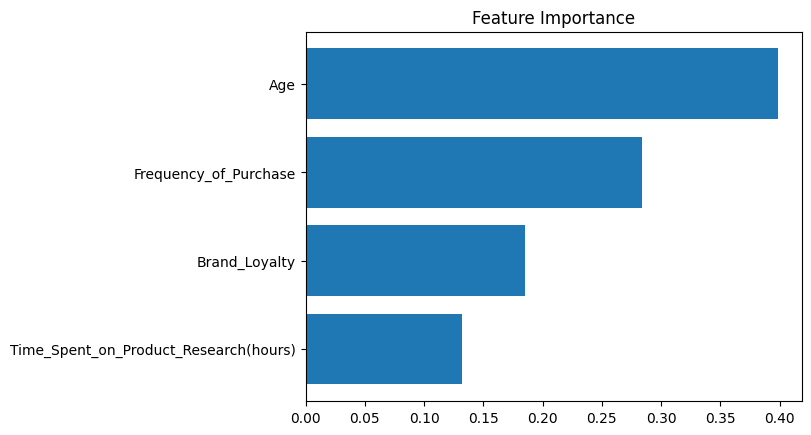

In [27]:
# Using Random Forest Feature Importances
feature_importances = best_rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

# Plot top features
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importance")
plt.show()


In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Adjust the labels by subtracting 1
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Create and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1)
xgb_model.fit(X_train, y_train_adjusted)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Adjust predictions to match the original label scale (by adding 1)
y_pred_xgb_original = y_pred_xgb + 1

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:\n", classification_report(y_test, y_pred_xgb_original))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_original)}")


Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.09      0.10        22
           2       0.05      0.05      0.05        19
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        18
           5       0.08      0.07      0.08        14
           6       0.07      0.08      0.08        25
           7       0.10      0.14      0.12        22
           8       0.05      0.04      0.05        24
           9       0.05      0.06      0.05        18
          10       0.08      0.07      0.08        14

    accuracy                           0.06       200
   macro avg       0.06      0.06      0.06       200
weighted avg       0.06      0.06      0.06       200

Accuracy: 0.06


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {scores.mean()} ± {scores.std()}")


Cross-validated accuracy: 0.1 ± 0.018708286933869712


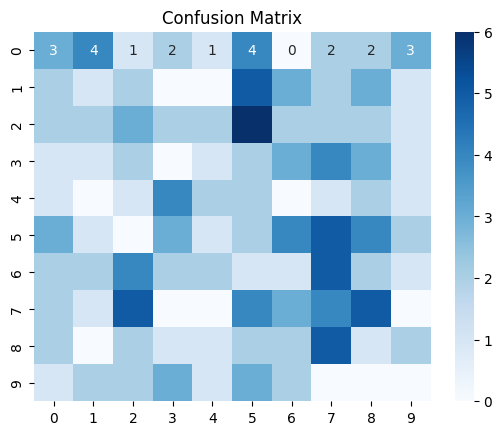

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
